In [ ]:
!pip install TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np

In [2]:
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
    # Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
    # Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
    # Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



53
(10580, 5)
(21999, 5)


In [36]:
url = 'https://amlkg.systemsbiology.org:9990/AMLkg/meta_knowledge_graph'
response = requests.get(url)

In [38]:
url = 'https://amlkg.systemsbiology.org:9990/AMLkg/meta_knowledge_graph'
response = requests.get(url)
data = response.json()
for i in range(len(data["edges"])):
    APInames, metaKG = translator_metakg.add_new_API_for_query(APInames, metaKG, "AMLKG", "https://amlkg.systemsbiology.org:9990/AMLkg/query", data["edges"][i]['predicate'], data["edges"][i]['subject'], data["edges"][i]['object'])


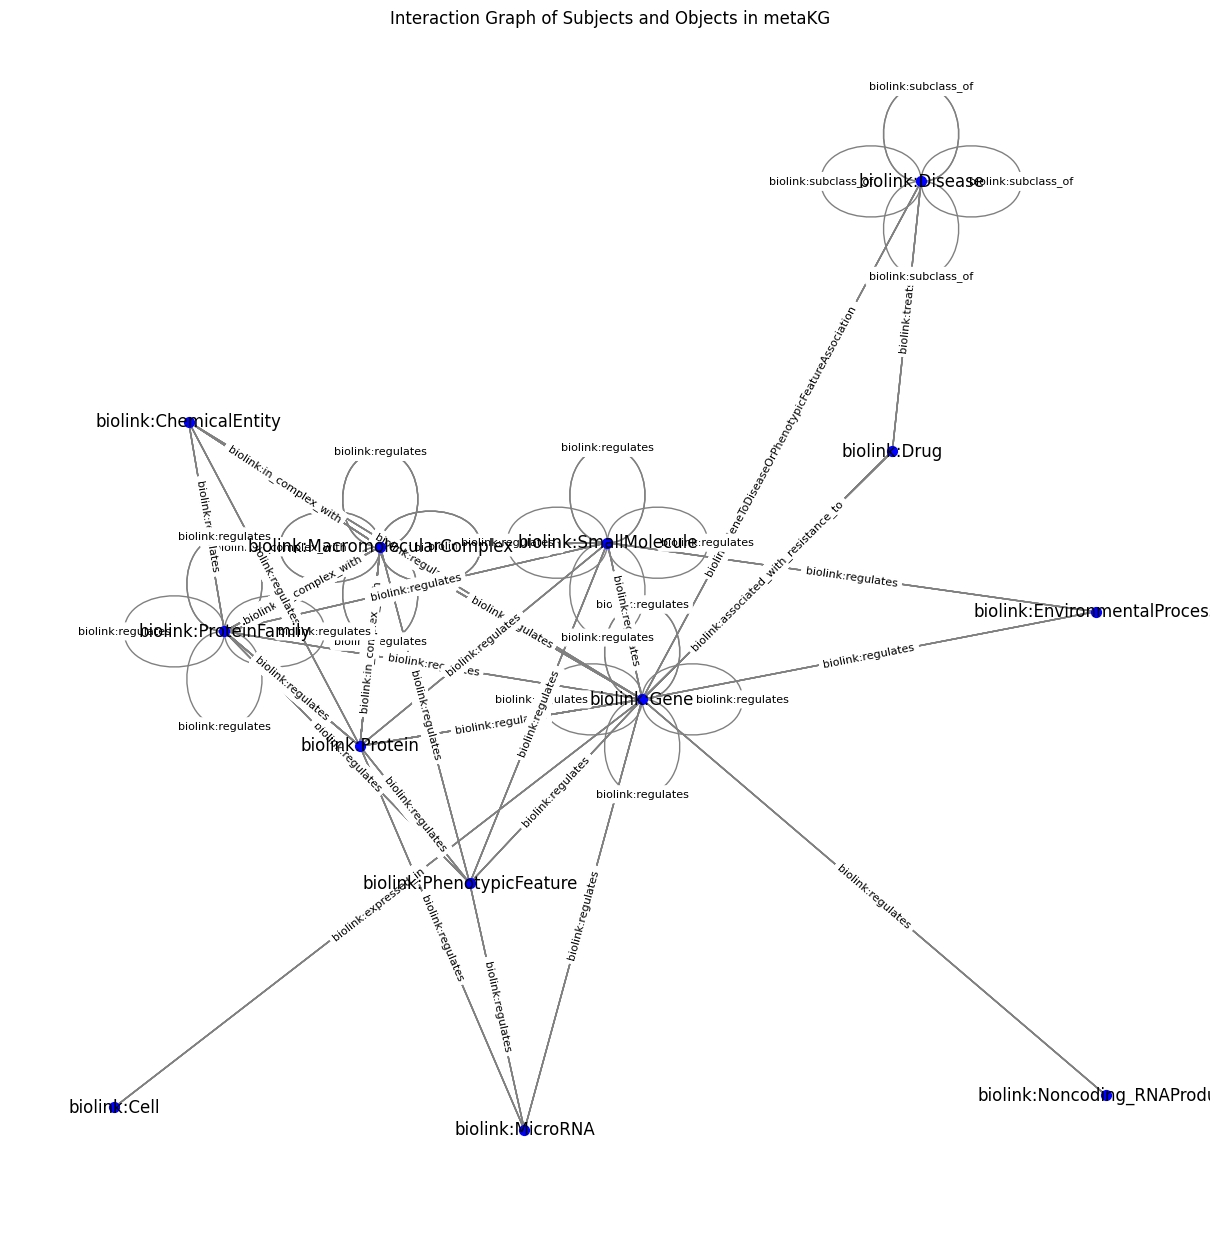

In [39]:
import networkx as nx
selected_KGs = ['AMLKG']

metaKG_sele = metaKG[metaKG['API'].isin(selected_KGs)]

# build a multigraph to capture all edges (including duplicates) and their predicates
G = nx.MultiGraph()
for _, row in metaKG_sele.iterrows():
        G.add_edge(row['Subject'], row['Object'], predicate=row['Predicate'])

# layout and draw nodes + edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos,
                with_labels=True,
                node_size=50,
                font_size=12,
                font_color='black',
                node_color='blue',
                edge_color='gray')

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()

In [40]:
metaKG_sele

,API,Predicate,Subject,Object,URL
21999,AMLKG,biolink:expressed_in,biolink:Gene,biolink:Cell,https://amlkg.systemsbiology.org:9990/AMLkg/query
22000,AMLKG,biolink:regulates,biolink:Gene,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22001,AMLKG,biolink:regulates,biolink:MacromolecularComplex,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22002,AMLKG,biolink:regulates,biolink:MacromolecularComplex,biolink:PhenotypicFeature,https://amlkg.systemsbiology.org:9990/AMLkg/query
22003,AMLKG,biolink:regulates,biolink:ChemicalEntity,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
...,...,...,...,...,...
22224,AMLKG,biolink:associated_with_sensitivity_to,biolink:Gene,biolink:Drug,https://amlkg.systemsbiology.org:9990/AMLkg/query
22225,AMLKG,biolink:associated_with_resistance_to,biolink:Gene,biolink:Drug,https://amlkg.systemsbiology.org:9990/AMLkg/query
22226,AMLKG,biolink:GeneToDiseaseOrPhenotypicFeatureAssoci...,biolink:Gene,biolink:Disease,https://amlkg.systemsbiology.org:9990/AMLkg/query
22227,AMLKG,biolink:treats,biolink:Drug,biolink:Disease,https://amlkg.systemsbiology.org:9990/AMLkg/query


In [15]:
APInames

{'RTX KG2 - TRAPI 1.5.0': 'https://kg2cploverdb.ci.transltr.io/kg2c/query',
 'ARAX Translator Reasoner - TRAPI 1.5.0': 'https://arax.transltr.io/api/arax/v1.4/query/',
 'Multiomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/multiomics/query',
 'Text Mined Cooccurrence API': 'https://cooccurrence.transltr.io/query/',
 'BioThings Explorer (BTE) TRAPI': 'https://bte.transltr.io/v1/query/',
 'MolePro': 'https://molepro-trapi.transltr.io/molepro/trapi/v1.5/query/',
 'Gene-List Network Enrichment Analysis': 'https://translator.broadinstitute.org/gelinea-trapi/v1.5/query/',
 'Microbiome KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/mbkp/query',
 'imProving Agent for TRAPI 1.5': 'https://ia.transltr.io/api/v1.5/query/',
 'SPOKE KP for TRAPI 1.5': 'https://spokekp.transltr.io/api/v1.5/query/',
 'Genetics Data Provider for NCATS Biomedical Translator Reasoners': 'https://genetics-kp.transltr.io/genetics_provider/trapi/v1.5/query/',
 'Drug Approvals KP - TRAPI 1.5.0': 'https://multio

In [41]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('aml',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = APInames,
                                                                                            metaKG = metaKG_sele,
                                                                                            API_predicates = API_predicates)    

MONDO:0018874
'AMLKG' generated an exception: 'AMLKG'


NodeNorm does not know about these identifiers: UMLS:DC0003818,UNII:FR89SC8CT4,UNII:E6349B696W,UMLS:DC0012155,UNII:PVH8394DLN,UNII:IZR558KO53,UNII:7EV65EAW6H,MESH:C411062,UNII:O5V0F26RUW,UNII:ET4JC4S66E,UNII:Y8DGL9885E,UMLS:DC0037549,UMLS:DC0041411,UMLS:C0062128,UMLS:C0002073,MESH:C438312,RXCUI:1795154,RXCUI:1433769,UMLS:C0596087,UMLS:C0597573,RXCUI:1729198,RXCUI:1795608,RXCUI:1658260,RXCUI:379454,RXCUI:1723777,RXCUI:1362054,RXCUI:1656667,RXCUI:1362049,RXCUI:1665191,RXCUI:1807509,RXCUI:1860240,RXCUI:1362058,RXCUI:1662281,RXCUI:1666799,RXCUI:900963,RXCUI:1719287,RXCUI:1360104,RXCUI:1860464,DRUGBANK:DB15060,REACT:R-ALL-9692345,MESH:D000596,MESH:C063694,RXCUI:1722942,RXCUI:1736582,RXCUI:1791496,MESH:C060751,MESH:C518484,MESH:C014553,MESH:C400142,MESH:D000269,MESH:C084574,MESH:D006202,MESH:C087490,MESH:C052498,MESH:C031179,MESH:C060154,MESH:C039418,MESH:D045930,MESH:D000395,MESH:C081693,MESH:C059764,UNII:475247QF1Z,UNII:RXG7T6RB8K,UNII:3FXW1IW7WT,UNII:3D2KVS9K7P,UNII:Q805XO2F7C,UNII:VS12X2

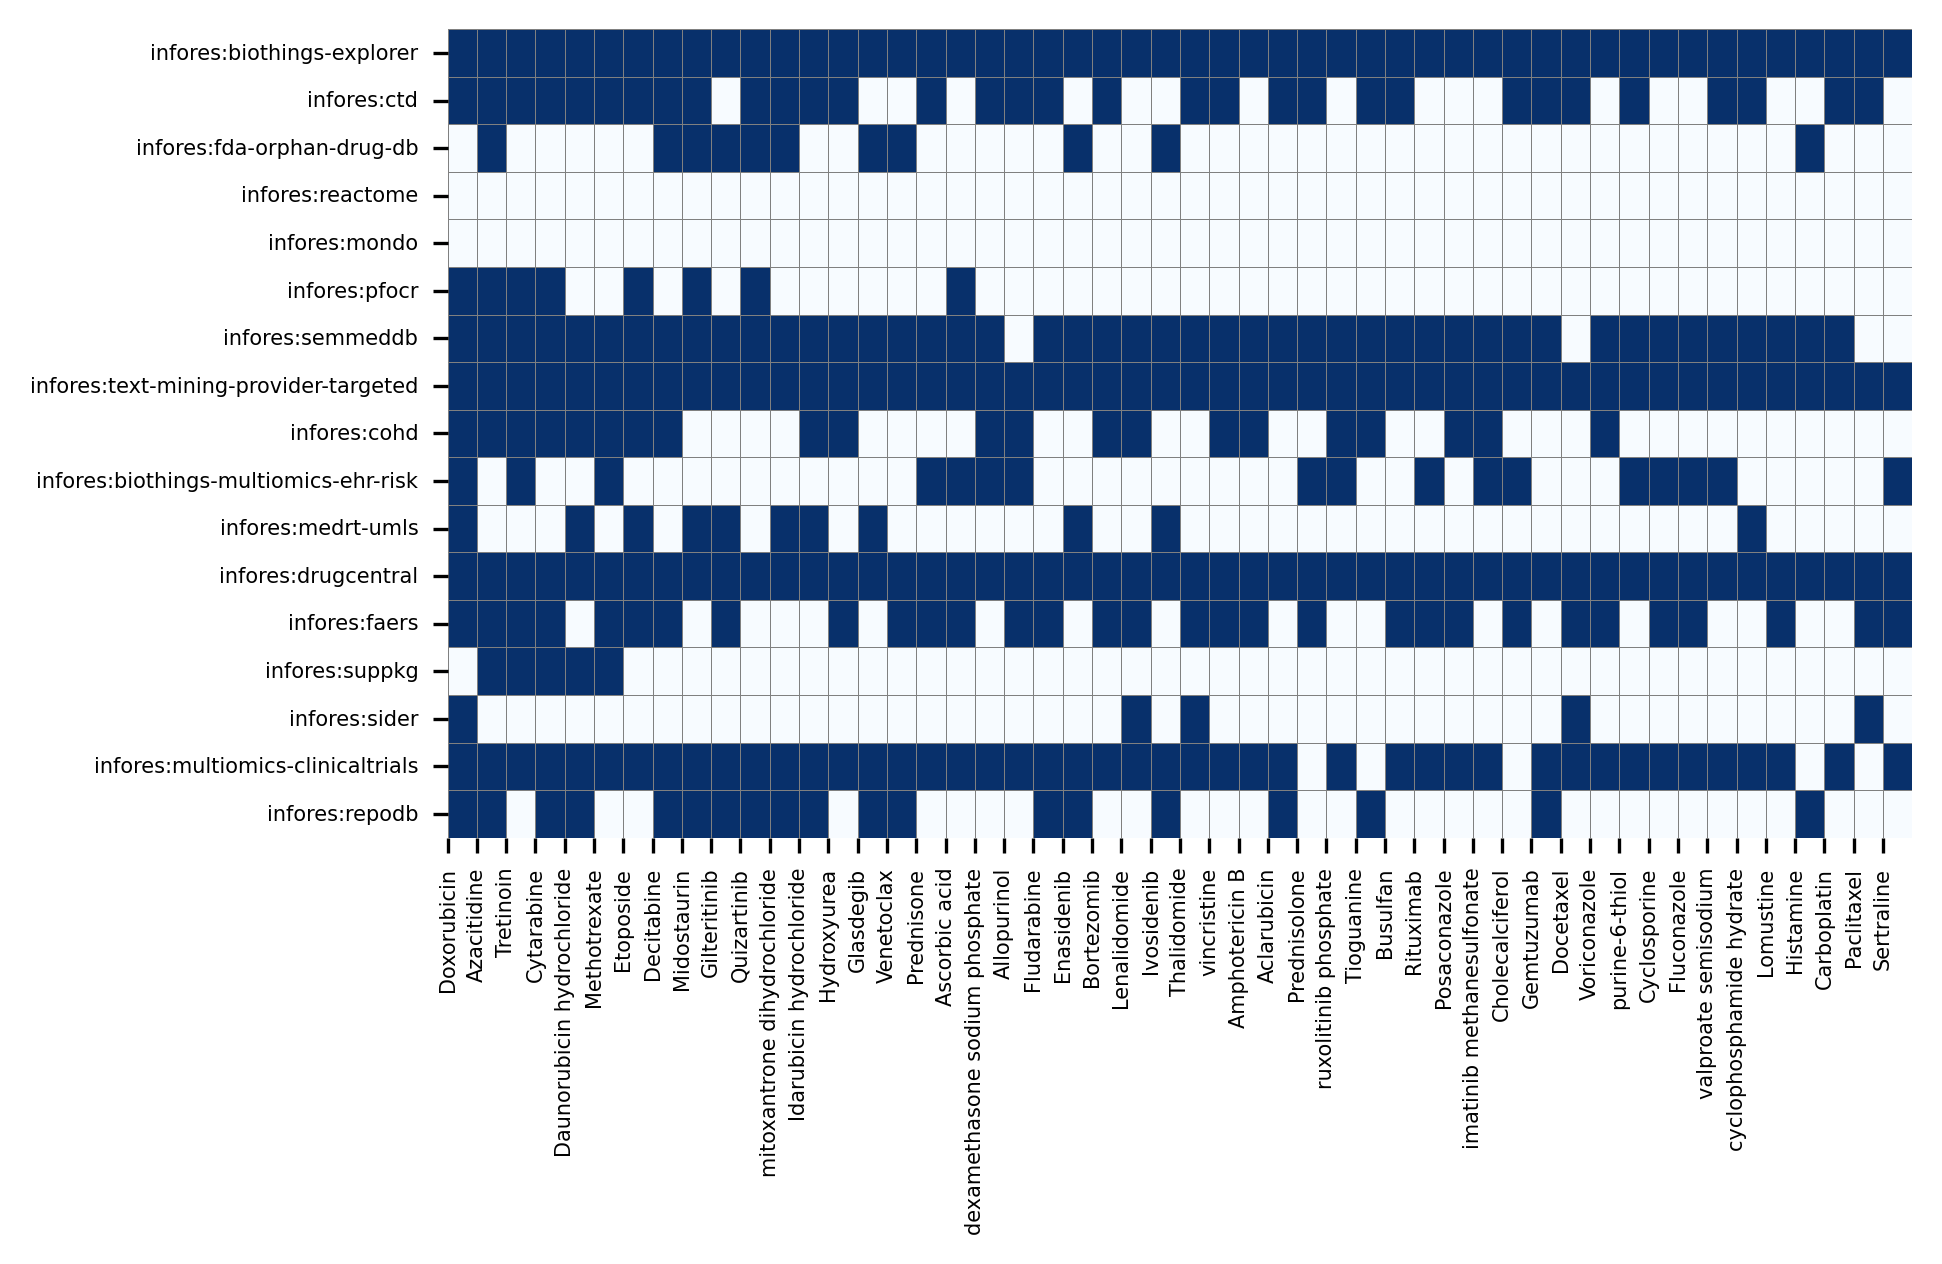

[Text(0.5, 0, 'Doxorubicin'), Text(2.5, 0, 'Tretinoin'), Text(4.5, 0, 'Daunorubicin hydrochloride'), Text(6.5, 0, 'Etoposide'), Text(8.5, 0, 'Midostaurin'), Text(10.5, 0, 'Quizartinib'), Text(12.5, 0, 'Idarubicin hydrochloride'), Text(14.5, 0, 'Glasdegib'), Text(16.5, 0, 'Prednisone'), Text(18.5, 0, 'dexamethasone sodium phosphate'), Text(20.5, 0, 'Fludarabine'), Text(22.5, 0, 'Bortezomib'), Text(24.5, 0, 'Ivosidenib'), Text(26.5, 0, 'vincristine'), Text(28.5, 0, 'Aclarubicin'), Text(30.5, 0, 'ruxolitinib phosphate'), Text(32.5, 0, 'Busulfan'), Text(34.5, 0, 'Posaconazole'), Text(36.5, 0, 'Cholecalciferol'), Text(38.5, 0, 'Docetaxel'), Text(40.5, 0, 'purine-6-thiol'), Text(42.5, 0, 'Fluconazole'), Text(44.5, 0, 'cyclophosphamide hydrate'), Text(46.5, 0, 'Histamine'), Text(48.5, 0, 'Paclitaxel')]


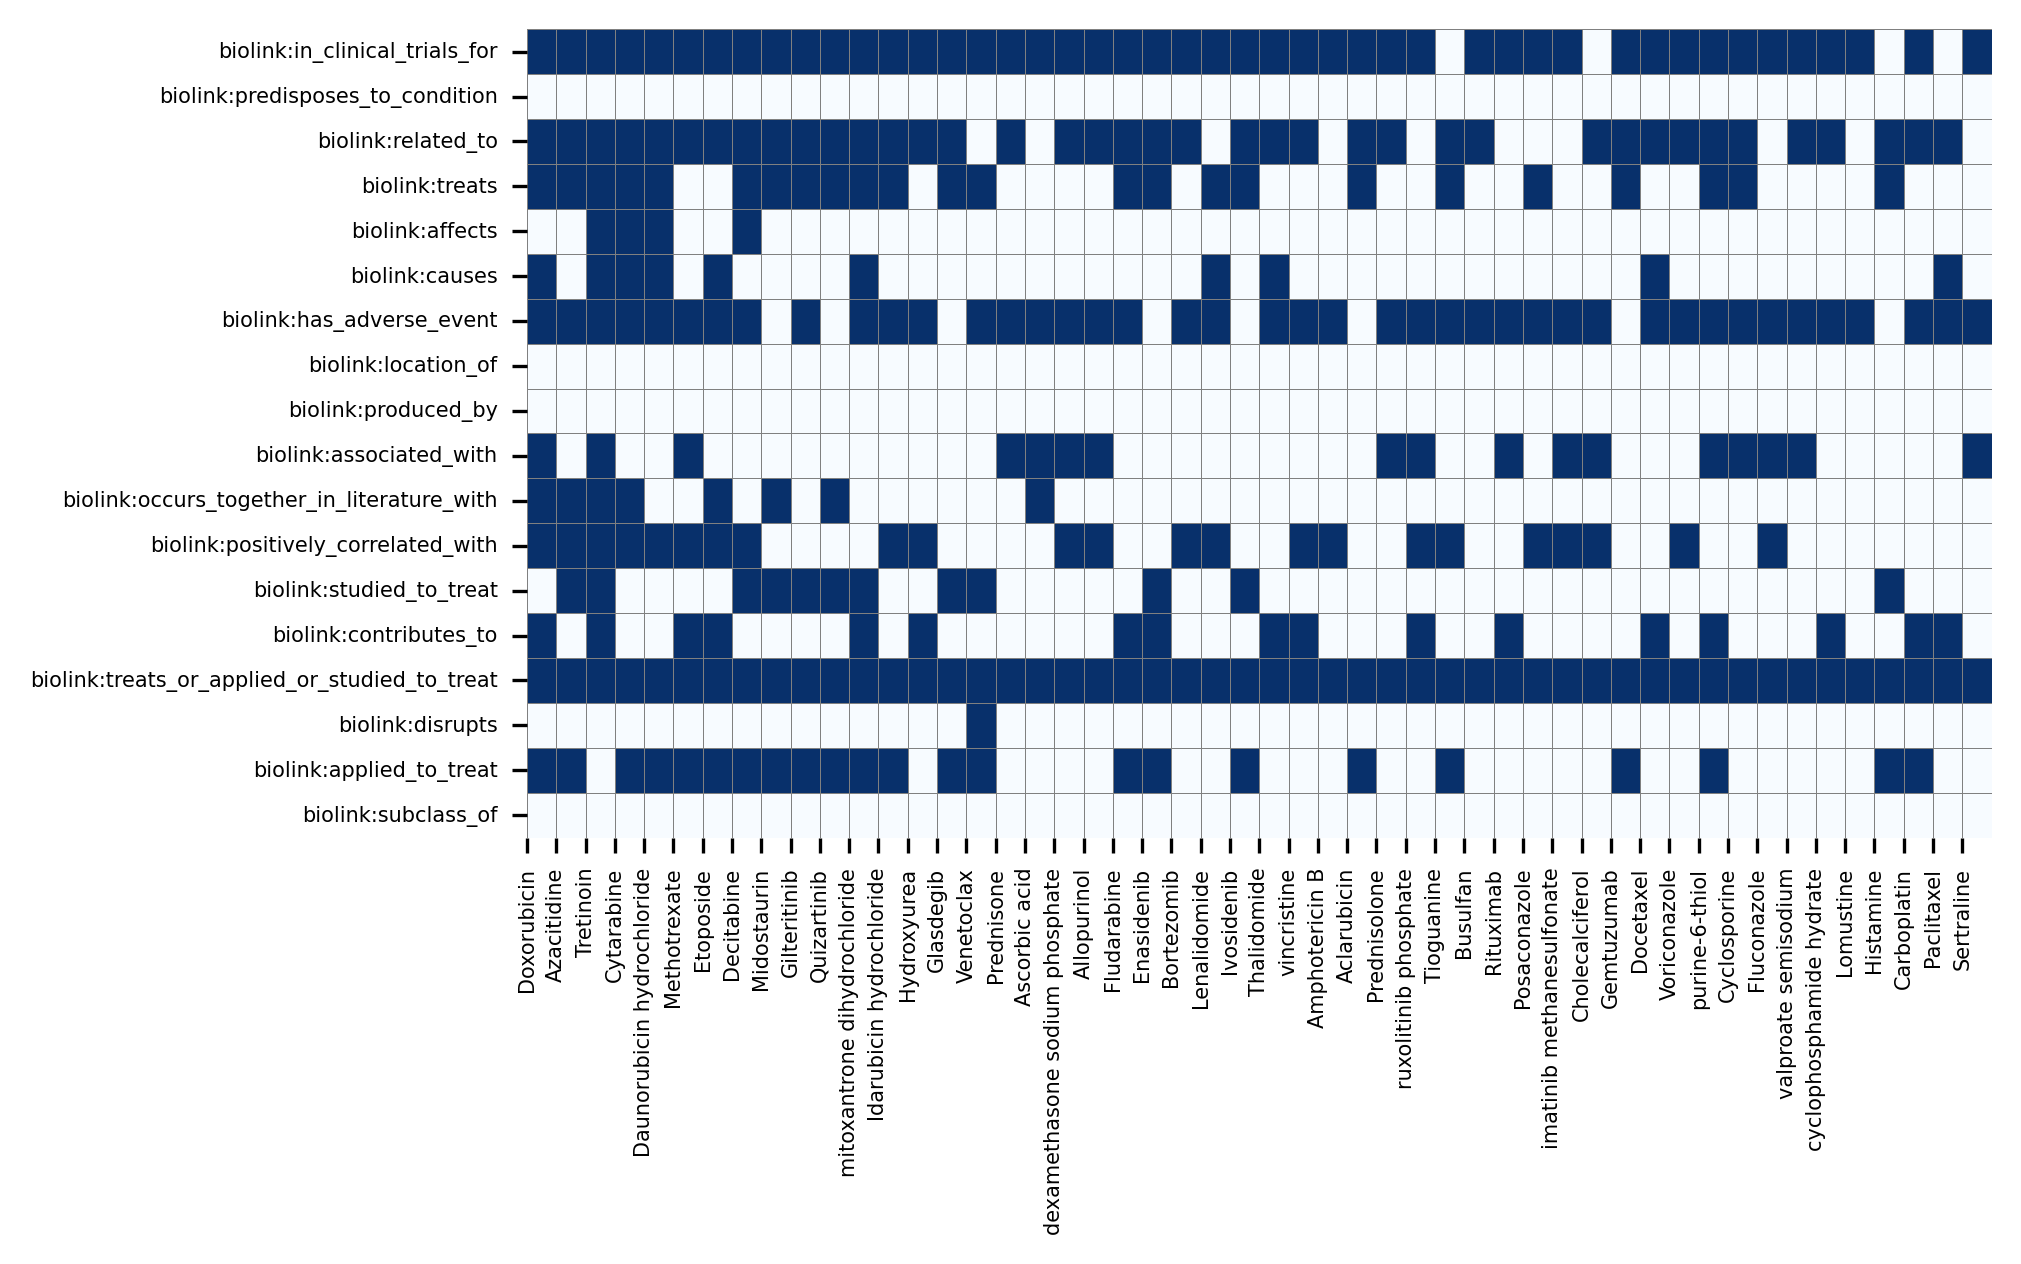

,Doxorubicin,Azacitidine,Tretinoin,Cytarabine,Daunorubicin hydrochloride,Methotrexate,Etoposide,Decitabine,Midostaurin,Gilteritinib,...,Tosedostat,ALT-801,INTERLEUKIN-7 HUMAN RECOMBINANT,ruxolitinib phosphate,Pevonedistat,Teriparatide,CICLOPIROX OLAMINE,REZATAPOPT,CDX-301,Am 80
biolink:in_clinical_trials_for,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
biolink:predisposes_to_condition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:related_to,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:treats,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:affects,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:causes,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:has_adverse_event,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
biolink:location_of,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:produced_by,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:associated_with,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

MONDO:0018874
NCBIGene:7157
'AMLKG' generated an exception: 'AMLKG'
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Automat-reactome(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hmdb(Trapi v1.5.0)' ge

/Users/guangrong/Documents/GitHub_project/TCT/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


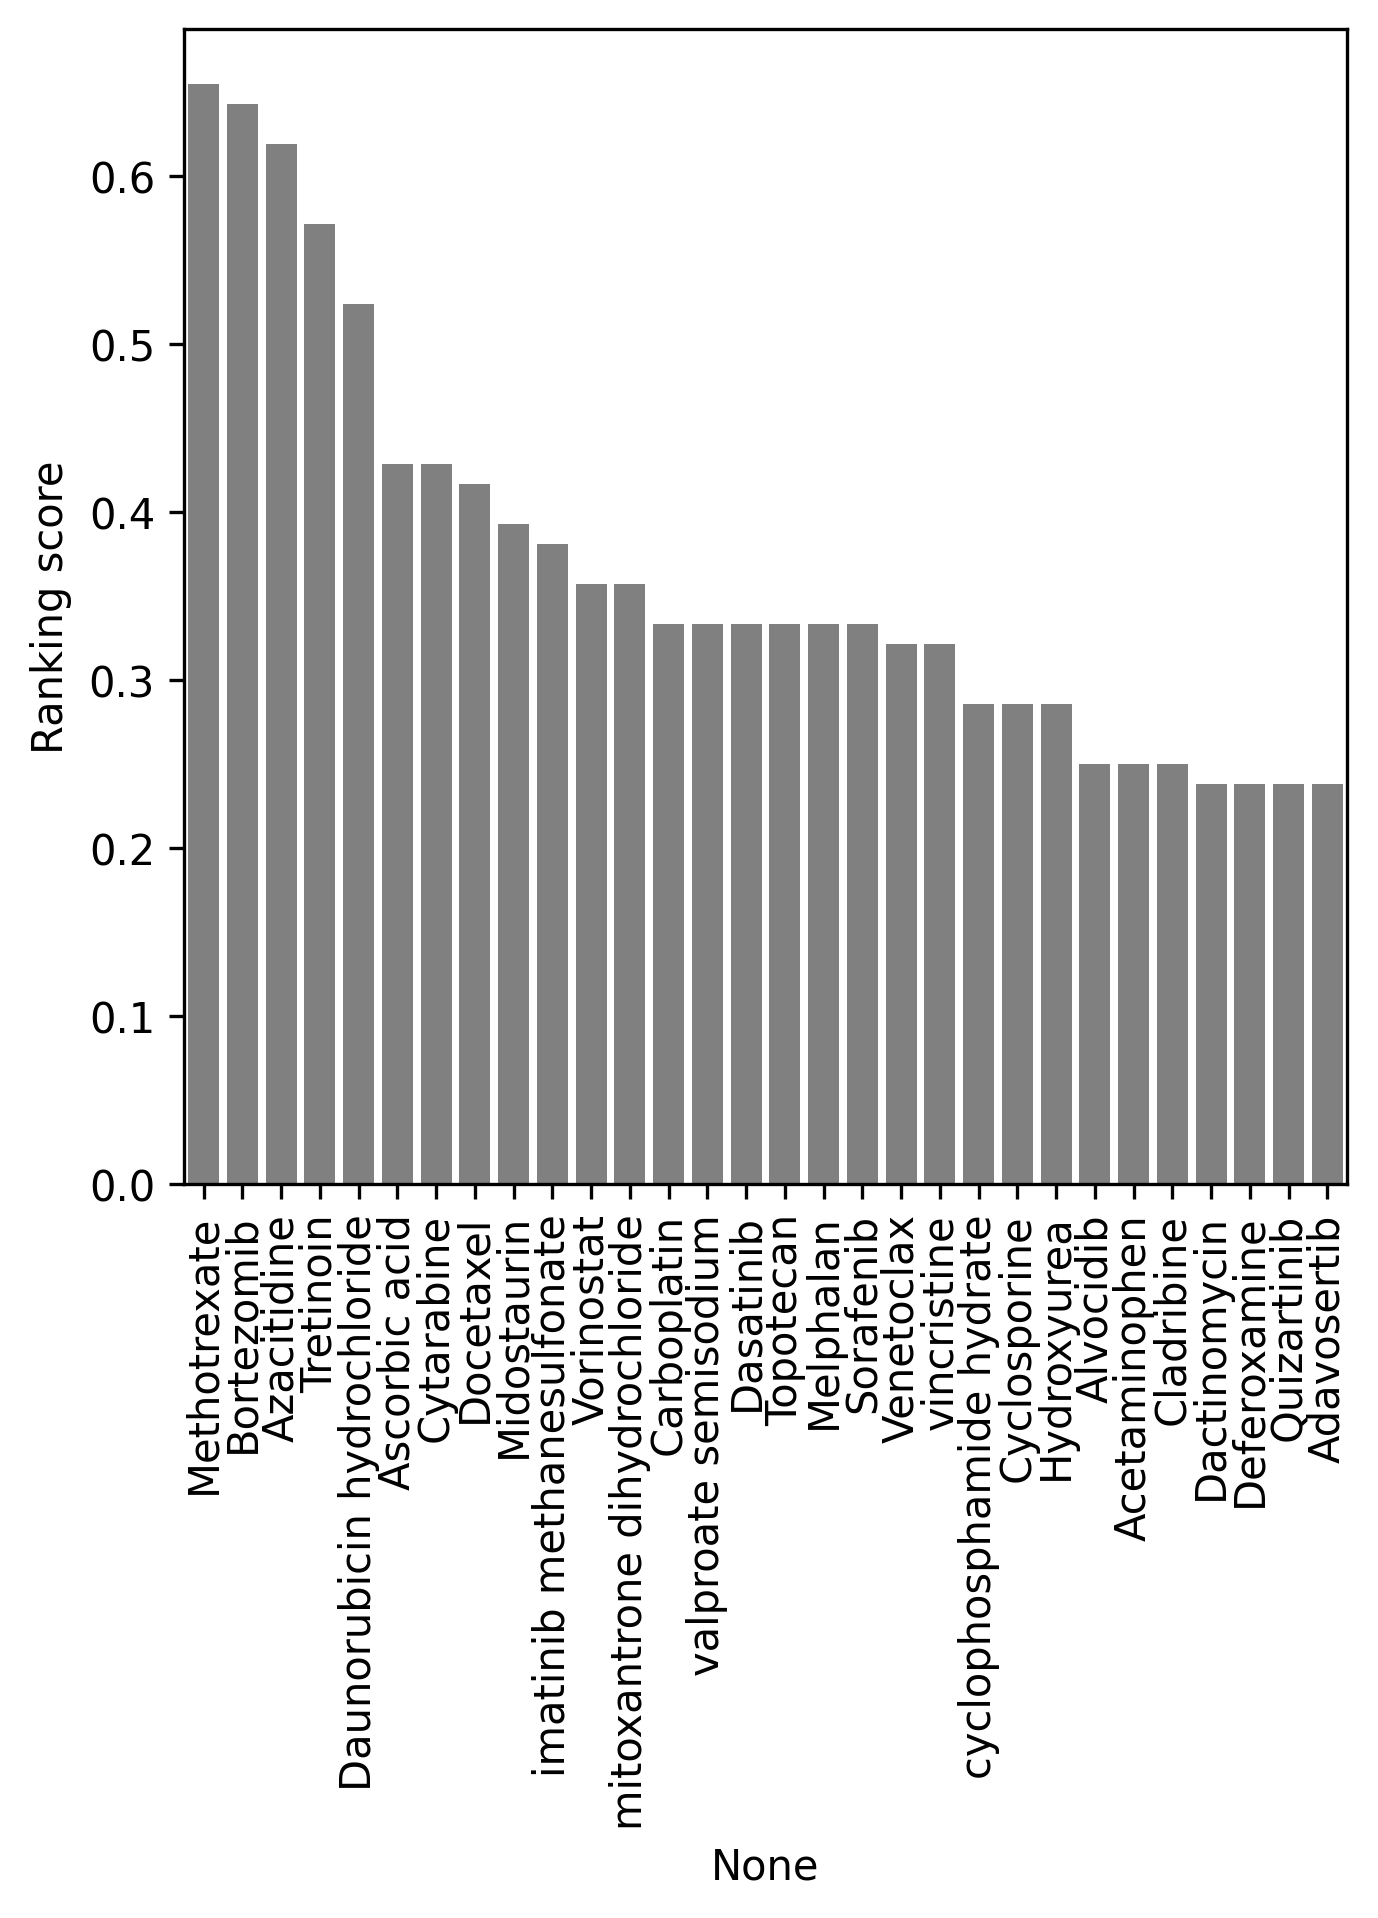

In [20]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('AML', 
                                                                                                                                                                                'TP53', 
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'], 
                                                                                                                                                                                APInames=APInames, 
                                                                                                                                                                                metaKG=metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [28]:
paths.head(20)

,score,output_node,predictes1,predictes2,output_node_name
Methotrexate,0.654762,CHEBI:44185,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:affe...,Methotrexate
Bortezomib,0.642857,CHEBI:52717,biolink:in_clinical_trials_for; biolink:relate...,biolink:interacts_with; biolink:affects; bioli...,Bortezomib
Azacitidine,0.619048,CHEBI:2038,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Azacitidine
Tretinoin,0.571429,CHEBI:15367,biolink:in_clinical_trials_for; biolink:relate...,biolink:interacts_with; biolink:affects; bioli...,Tretinoin
Daunorubicin hydrochloride,0.523810,CHEBI:31456,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Daunorubicin hydrochloride
Ascorbic acid,0.428571,CHEBI:22652,biolink:in_clinical_trials_for; biolink:has_ad...,biolink:affects; biolink:affects; biolink:rela...,Ascorbic acid
Cytarabine,0.428571,CHEBI:28680,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Cytarabine
Docetaxel,0.416667,CHEBI:4672,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Docetaxel
Midostaurin,0.392857,CHEBI:63452,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:related_to; biolink:a...,Midostaurin
imatinib methanesulfonate,0.380952,CHEBI:31690,biolink:in_clinical_trials_for; biolink:positi...,biolink:affects; biolink:related_to; biolink:o...,imatinib methanesulfonate


In [26]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Bortezomib').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…